<a href="https://colab.research.google.com/github/MakeThaClap/EstadisticaVerano/blob/main/PROYECTO_UNIDAD_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [33]:
import pandas as pd
df= pd.read_csv("https://raw.githubusercontent.com/MakeThaClap/EstadisticaVerano/refs/heads/main/insurance.csv")
df


,age,sex,bmi,children,smoker,region,expenses
0,19,female,27.9,0,yes,southwest,16884.92
1,18,male,33.8,1,no,southeast,1725.55
2,28,male,33.0,3,no,southeast,4449.46
3,33,male,22.7,0,no,northwest,21984.47
4,32,male,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,male,31.0,3,no,northwest,10600.55
1334,18,female,31.9,0,no,northeast,2205.98
1335,18,female,36.9,0,no,southeast,1629.83
1336,21,female,25.8,0,no,southwest,2007.95


#Importacion de datos

## Edad

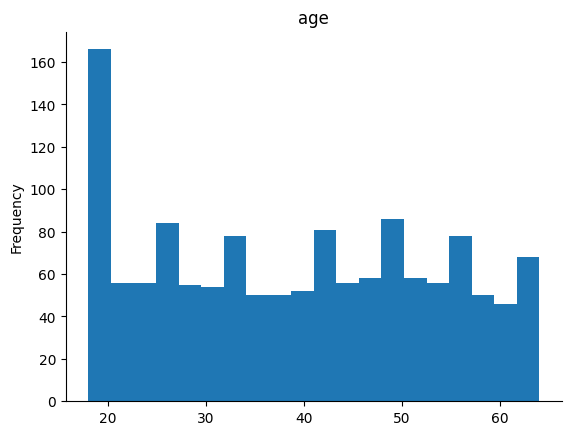

In [34]:

from matplotlib import pyplot as plt
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

##Sexo

In [35]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal=ols(" expenses ~ C(sex)", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
#if valor_p_psh<0.05:
 # print("Ho: No hay relacion entre X y Y")
#else:
 # print("H1: Si hay relacion entre X y Y")
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(sex),1.0,6.435904e+08,6.435904e+08,4.399703,0.036133
Residual,1336.0,1.954306e+11,1.462804e+08,NaN,NaN


  Multiple Comparison of Means - Tukey HSD, FWER=0.05  
group1 group2  meandiff p-adj   lower    upper   reject
-------------------------------------------------------
female   male 1387.1725 0.0361 89.8125 2684.5326   True
-------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

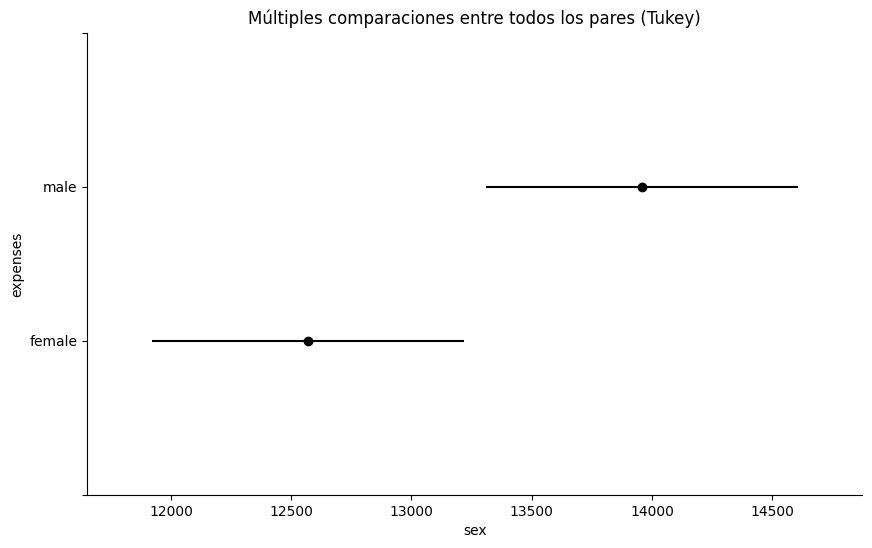

In [36]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['expenses'], groups=df['sex'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="expenses", xlabel="sex")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Test de Tukey\
# Es mejor cocerlos con Sal o T3



In [37]:
df ['sex']=df['sex'].map(
    {'male':0, "female":1})
df

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,yes,southwest,16884.92
1,18,0,33.8,1,no,southeast,1725.55
2,28,0,33.0,3,no,southeast,4449.46
3,33,0,22.7,0,no,northwest,21984.47
4,32,0,28.9,0,no,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,0,31.0,3,no,northwest,10600.55
1334,18,1,31.9,0,no,northeast,2205.98
1335,18,1,36.9,0,no,southeast,1629.83
1336,21,1,25.8,0,no,southwest,2007.95


##BMI

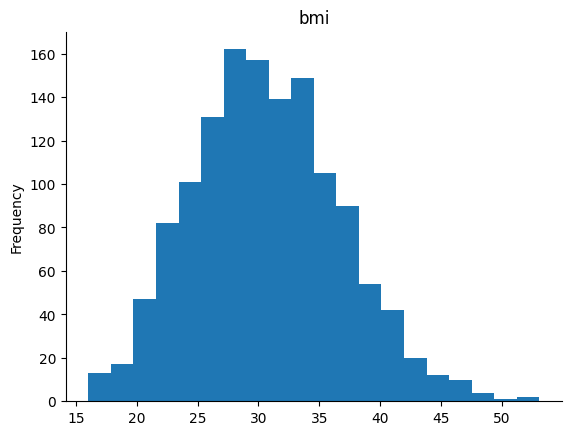

In [38]:

from matplotlib import pyplot as plt
df['bmi'].plot(kind='hist', bins=20, title='bmi')
plt.gca().spines[['top', 'right',]].set_visible(False)

##Niños

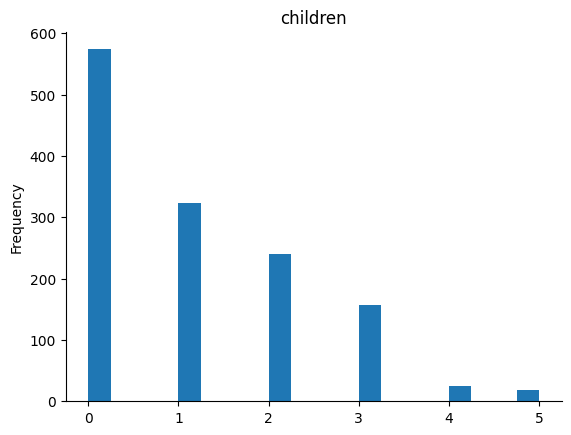

In [39]:


from matplotlib import pyplot as plt
df['children'].plot(kind='hist', bins=20, title='children')
plt.gca().spines[['top', 'right',]].set_visible(False)

##Fumadores

In [40]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal=ols(" expenses ~ C(smoker)", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
#if valor_p_psh<0.05:
 # print("Ho: No hay relacion entre X y Y")
#else:
 # print("H1: Si hay relacion entre X y Y")
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(smoker),1.0,1.215199e+11,1.215199e+11,2177.614859,8.271450e-283
Residual,1336.0,7.455432e+10,5.580413e+07,NaN,NaN


    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
group1 group2  meandiff  p-adj   lower      upper    reject
-----------------------------------------------------------
    no    yes 23615.9635   0.0 22623.1748 24608.7523   True
-----------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

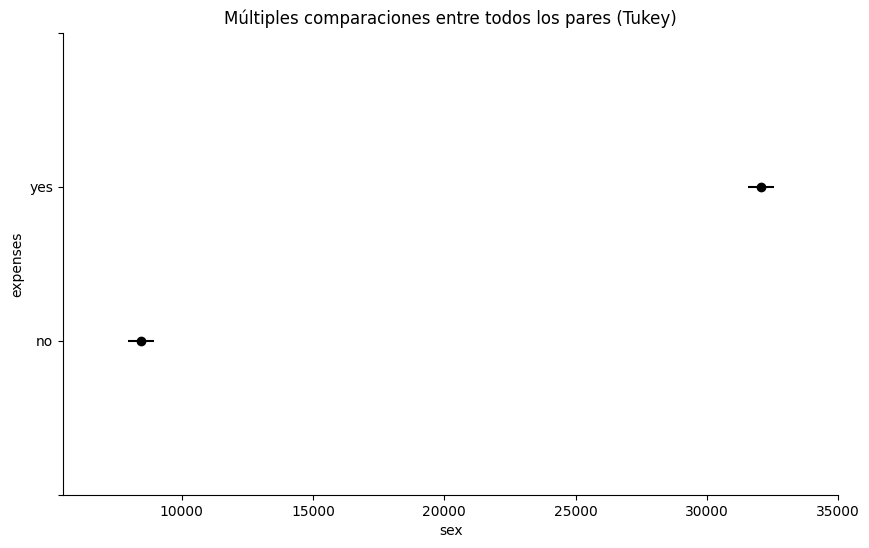

In [41]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['expenses'], groups=df['smoker'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="expenses", xlabel="sex")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Test de Tukey\
# Es mejor cocerlos con Sal o T3



In [42]:
df ['smoker']=df['smoker'].map(
    {'no':0, "yes":1})
df

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,southwest,16884.92
1,18,0,33.8,1,0,southeast,1725.55
2,28,0,33.0,3,0,southeast,4449.46
3,33,0,22.7,0,0,northwest,21984.47
4,32,0,28.9,0,0,northwest,3866.86
...,...,...,...,...,...,...,...
1333,50,0,31.0,3,0,northwest,10600.55
1334,18,1,31.9,0,0,northeast,2205.98
1335,18,1,36.9,0,0,southeast,1629.83
1336,21,1,25.8,0,0,southwest,2007.95


##Region

In [43]:
from statsmodels.formula.api import ols
import statsmodels.api as sm
modelo_lineal=ols(" expenses ~ C(region)", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
#if valor_p_psh<0.05:
 # print("Ho: No hay relacion entre X y Y")
#else:
 # print("H1: Si hay relacion entre X y Y")
tabla_anova

,df,sum_sq,mean_sq,F,PR(>F)
C(region),3.0,1.300760e+09,4.335865e+08,2.969627,0.030893
Residual,1334.0,1.947735e+11,1.460071e+08,NaN,NaN


       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
  group1    group2   meandiff  p-adj    lower      upper   reject
-----------------------------------------------------------------
northeast northwest  -988.8095 0.7245 -3428.9347 1451.3157  False
northeast southeast  1329.0268 0.4745 -1044.9417 3702.9954  False
northeast southwest -1059.4468 0.6792  -3499.572 1380.6784  False
northwest southeast  2317.8364 0.0583   -54.1991 4689.8719  False
northwest southwest   -70.6373 0.9999 -2508.8818 2367.6073  False
southeast southwest -2388.4736 0.0477 -4760.5091  -16.4381   True
-----------------------------------------------------------------


Text(0.5, 1.0, 'Múltiples comparaciones entre todos los pares (Tukey)')

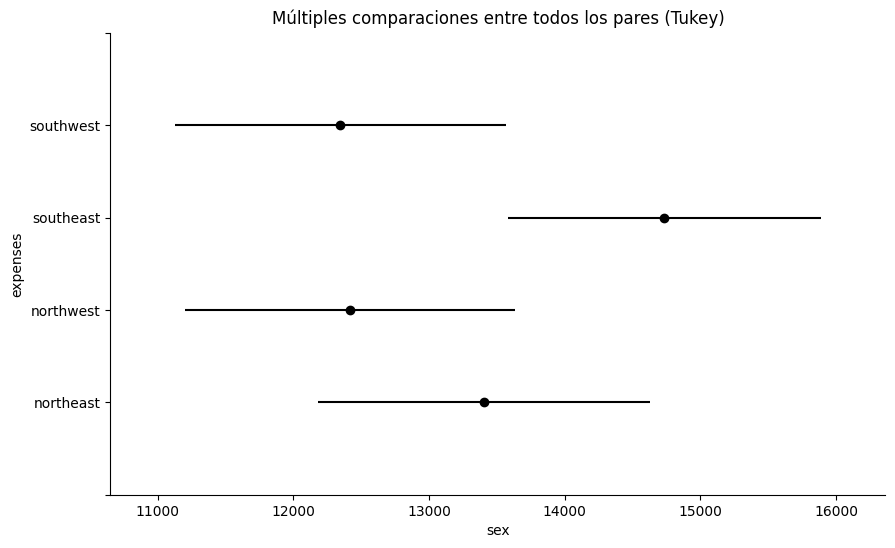

In [44]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt

nivel_de_significancia = 0.05

# Prueba de Tukey
tukey = pairwise_tukeyhsd(endog=df['expenses'], groups=df['region'], alpha=nivel_de_significancia)

# Mostrar los resultados
print(tukey)

# Gráfico de las diferencias entre grupos
tukey.plot_simultaneous(ylabel="expenses", xlabel="sex")
plt.gca().spines['right'].set_visible(False) # derecha
plt.gca().spines['top'].set_visible(False)   # superior
plt.title("Múltiples comparaciones entre todos los pares (Tukey)")
#Test de Tukey\
# Es mejor cocerlos con Sal o T3



In [45]:
df ['region']=df['region'].map(
    {'northeast':0, "northwest":1, "southeast":2,"southwest":3})
df

,age,sex,bmi,children,smoker,region,expenses
0,19,1,27.9,0,1,3,16884.92
1,18,0,33.8,1,0,2,1725.55
2,28,0,33.0,3,0,2,4449.46
3,33,0,22.7,0,0,1,21984.47
4,32,0,28.9,0,0,1,3866.86
...,...,...,...,...,...,...,...
1333,50,0,31.0,3,0,1,10600.55
1334,18,1,31.9,0,0,0,2205.98
1335,18,1,36.9,0,0,2,1629.83
1336,21,1,25.8,0,0,3,2007.95


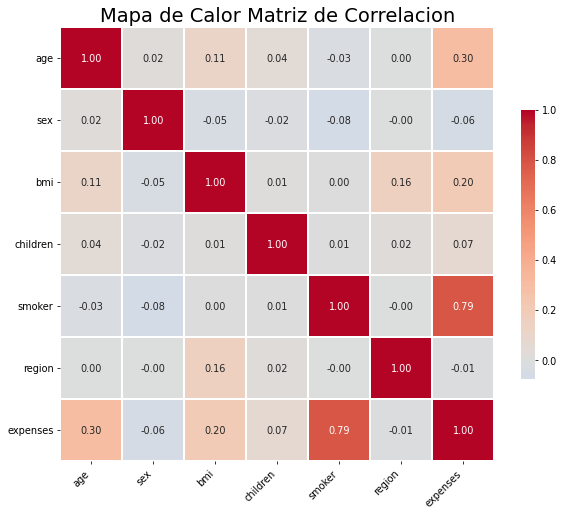

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt
matriz_de_correlacion=df.corr()
plt.figure(figsize=(10,10),dpi=70)
sns.heatmap(matriz_de_correlacion, #lo que va a grafica
    annot=True,#se muestran los valores en las celdas
    fmt="0.2f", #0.2f significa 2 decimales
    cmap="coolwarm", #paleta de colroes
    square=True,#forzar cuadrado
    linewidths=0.5,#grosor de lineas
    cbar_kws={"shrink":0.5}, #tama;o de barra lateral
    center=0, #linea vertical central
)
plt.title("Mapa de Calor Matriz de Correlacion",fontsize=20)
plt.xticks(rotation=45, ha="right")
plt.yticks(rotation=0)
plt.show()


      age  sex   bmi  children  smoker  region  expenses
0      19    1  27.9         0       1       3  16884.92
1      18    0  33.8         1       0       2   1725.55
2      28    0  33.0         3       0       2   4449.46
3      33    0  22.7         0       0       1  21984.47
4      32    0  28.9         0       0       1   3866.86
...   ...  ...   ...       ...     ...     ...       ...
1333   50    0  31.0         3       0       1  10600.55
1334   18    1  31.9         0       0       0   2205.98
1335   18    1  36.9         0       0       2   1629.83
1336   21    1  25.8         0       0       3   2007.95
1337   61    1  29.1         0       1       1  29141.36

[1338 rows x 7 columns]


COEFICIENTE DE CORRELACION:  0.7873

COEFICIENTE DE DETERMINACION:  0.6198 

INTERVALO DE CONFIANZA DEL PARA b1 ES: 95% 

 22623.1748 < b1 <  24608.7523 

valor_p_sh: 1.6718566049034953e-18


Los datos no siguen una distribucion normal
valor_p_bp: 2.826729850182035e-45


Hay heteroscedast

,df,sum_sq,mean_sq,F,PR(>F)
expenses,1.0,135.040175,135.040175,2177.614859,8.271450e-283
Residual,1336.0,82.849212,0.062013,NaN,NaN


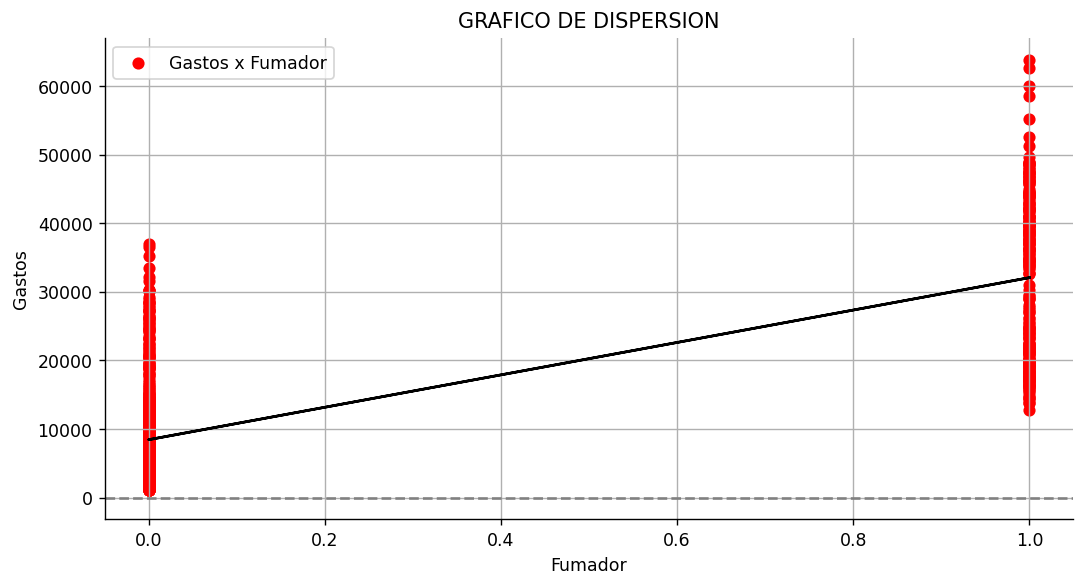

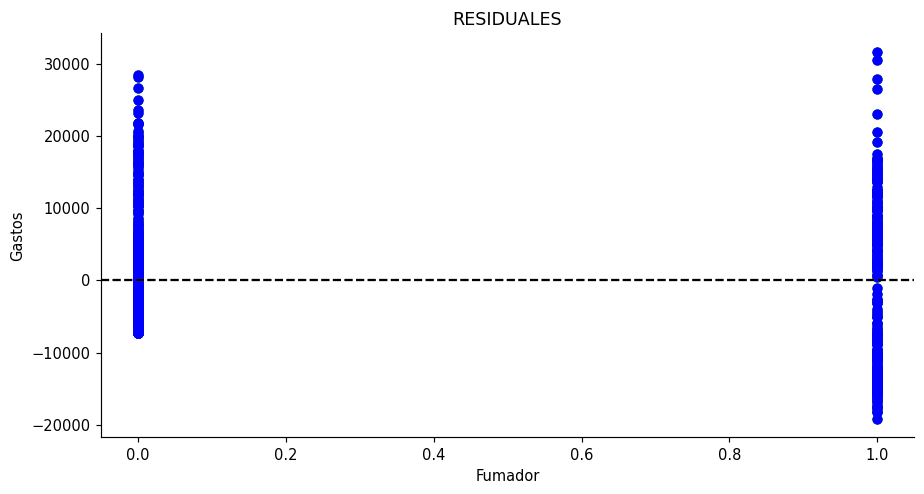

In [48]:
x=df["smoker"]
y=df["expenses"]
df.head(10)
print(df)
print("\n")

#REALIZAR UN DIAGRAMA DE DISPERSION PARA LOS DATOS
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5),dpi=125)
plt.scatter(x,y,
    label="Gastos x Fumador",
    color="RED")
plt.title("GRAFICO DE DISPERSION")
plt.xlabel("Fumador")
plt.ylabel("Gastos")
plt.axhline(y=0, color="GREY", linestyle="--")
plt.legend()
plt.grid()
df.head()
plt.gca().spines[["top","right"]].set_visible(False)

#3.- LOS DATOS SOPORTAN LA SUPOSICION DE LIENALIDAD
#NO

#4.- CALCULAR EL COEFICIENTE DE CORRELACION
from scipy.stats import pearsonr
r,_=pearsonr(x,y)
print( f"COEFICIENTE DE CORRELACION: {r: 0.4f}\n")

#6.- OBTENGA LA RECTA DE REGRESION AJUSTADA Y GRAFICAR SOBRE EL GRAFICO DE
#DISPERSION
import statsmodels.api as sm
x_constante=sm.add_constant(x)
modelo=sm.OLS(y,x_constante).fit()
yc=modelo.predict(x_constante)
plt.plot(x,yc, color="BLACK")

#5.- CALCULE EL COEFICIENTE DE DETERMINACION E INTERPRETE EL RESULTADO
from sklearn.metrics import r2_score
r2=r2_score(y,yc)
print( f"COEFICIENTE DE DETERMINACION: {r2: 0.4f} \n")

#7.-OBTENGA UN INTERVALO DE CONFIANZA DEL 95% PARA LA PENDIENTE DE LA RECTA DE
nivel_confianza= 0.95
intervalo_de_confianza=modelo.conf_int(alpha= 1 - nivel_confianza)
intervalo_de_confianza_b1=intervalo_de_confianza.iloc[1]
print(f"INTERVALO DE CONFIANZA DEL PARA b1 ES: {nivel_confianza:0.0%} \n")
print(f"{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f} \n")

#8.- CALCULE LOS RESIDUALES Y TRACE UN NUEVO GRAFICO DE DISPERSION. COMENTE,
# PARECE QUE SE VERIFICAN LOS SUPUESTOS
residuales= modelo.resid
plt.figure(figsize=(10,5),dpi=105)
plt.scatter(x,residuales, color="Green")
plt.title("RESIDUALES")
plt.xlabel("Fumador")
plt.ylabel("Gastos")
plt.axhline(y=0, color="grey", linestyle="--")
plt.scatter(x, residuales,
            label="Fumador",
            color="BLUE")
plt.axhline(y=0, color="BLACK", linestyle="--")
plt.gca().spines[["top","right"]].set_visible(False)

#9.- REALIZAR LA PRUEBA DE SHAPIRO PARA LOS RESIDUALES Y COMENTE EL RESULTADO
from scipy.stats import shapiro
estadistico_shapiro, valor_p_sh = shapiro(residuales)
print("valor_p_sh:", valor_p_sh )
print("\n")
if valor_p_sh<0.05:
  print("Los datos no siguen una distribucion normal")
else:
  print("Los datos siguen una distribucion normal \n")

#10.-REALIZAR LA PRUEBA DE BREUSCHPAGAN PARA LOS RESIDUALES Y COMENTE LOS RESULTADOS
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print("valor_p_bp:", valor_p_bp)
print("\n")
if valor_p_bp<0.05:
  print("Hay heteroscedasticidad")
else:
  print("Hay homosedasticidad \n")

#11.- UTILIZA LA RECTA DE REGRESION PARA INTERPOLAR DOS VALORES Y EXTRAPOLAR UNO
#COMENTA LOS RESULTADOS
#print(f"Para x = 5, y = {modelo.predict([1,5])[0]}")
#print(f"Para x = 8, y = {modelo.predict([1,8])[0]}")
#print(f"Para x = 20, y = {modelo.predict([1,20])[0]}\n")\

#12.- REALIZAR TABLA ANOVA E INTERPRETAR EL RESULTADO
from statsmodels.formula.api import ols
modelo_lineal=ols(" smoker ~ expenses", data=df).fit()
tabla_anova=sm.stats.anova_lm(modelo_lineal)
if valor_p_bp<0.05:
  print("No hay relacion entre X y Y")
else:
  print("Si hay relacion entre X y Y")
tabla_anova

Coeficiente de determinación:  0.7214

Intervalo de confianza para b1 de  95%
 23004.9122 < b1 <  24705.6974

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.0000



,df,sum_sq,mean_sq,F,PR(>F)
smoker,1.0,1.215199e+11,1.215199e+11,2969.807878,0.000000e+00
age,1.0,1.992820e+10,1.992820e+10,487.022526,2.909757e-92
Residual,1335.0,5.462612e+10,4.091844e+07,NaN,NaN


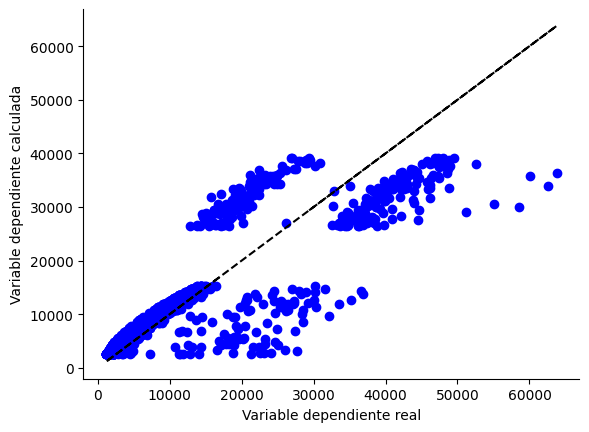

In [49]:
x = df[["smoker", "age"]]
y = df["expenses"]

# # 2. Realice un diagrama de dispersión para estos datos.
# import matplotlib.pyplot as plt
# plt.figure(figsize = (16, 8), dpi = 100)
# plt.scatter(x, y, label = "Promedio final", color = 'red')
# plt.xlabel('Exámenes cortos') # nombrar eje x
# plt.ylabel('Promedio final') # nombrar eje y
# plt.gca().spines[["top","right"]].set_visible(False)

# 3. ¿Los datos soportan la suposición de linealidad?
# Sí

# 4. Calcule el coeficiente de correlación e interprete el resultado.
# from scipy.stats import pearsonr
# r, _ = pearsonr(x, y)
# print(f'Coeficiente de correlación: {r: 0.4f}\n')

# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
# dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)
plt.figure()
plt.plot(y, y, color = 'black', linestyle = '--')

# 5. Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?
residuales = modelo.resid
plt.scatter(y, yc, color = 'blue')
plt.xlabel('Variable dependiente real')
plt.ylabel('Variable dependiente calculada')
plt.gca().spines[['top', 'right']].set_visible(False)

# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 11. Tres estudiantes sacaron 70, 75 y 84 de calificación. Según la recta de
# regresión ajustada, ¿cuáles son los resultados esperados para estos tres alumnos?
#print(f'para x1 = 0.5, x2 =3, x3=34, y = {modelo.predict([1, 0.5, 3, 34])}')
#print(f'para x1 = 1.5, x2 =2, x3=50, y = {modelo.predict([1, 1.5, 2, 50])}')
#print(f'para x1 = 2.5, x2 =4, x3=40, y = {modelo.predict([1, 2.0, 4, 40])}\n')
# print(f'para x = 72, y = {modelo.get_prediction([1, 0.5]).summary_frame()}')

# 12. Realice una tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols('expenses ~ smoker + age', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova

Coeficiente de determinación:  0.7475

Intervalo de confianza para b1 de  95%
 23012.6878 < b1 <  24632.5242

valor-p de Shapiro:  0.0000

valor_p de Breusch-Pagan:  0.0000



,df,sum_sq,mean_sq,F,PR(>F)
smoker,1.0,1.215199e+11,1.215199e+11,3274.201076,0.000000e+00
age,1.0,1.992820e+10,1.992820e+10,536.940349,4.212127e-100
bmi,1.0,5.115550e+09,5.115550e+09,137.832056,2.333050e-30
Residual,1334.0,4.951057e+10,3.711437e+07,NaN,NaN


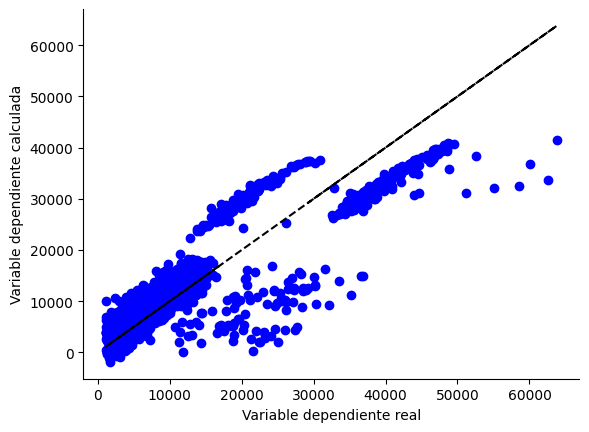

In [50]:
x = df[["smoker", "age", "bmi"]]
y = df["expenses"]

# # 2. Realice un diagrama de dispersión para estos datos.
# import matplotlib.pyplot as plt
# plt.figure(figsize = (16, 8), dpi = 100)
# plt.scatter(x, y, label = "Promedio final", color = 'red')
# plt.xlabel('Exámenes cortos') # nombrar eje x
# plt.ylabel('Promedio final') # nombrar eje y
# plt.gca().spines[["top","right"]].set_visible(False)

# 3. ¿Los datos soportan la suposición de linealidad?
# Sí

# 4. Calcule el coeficiente de correlación e interprete el resultado.
# from scipy.stats import pearsonr
# r, _ = pearsonr(x, y)
# print(f'Coeficiente de correlación: {r: 0.4f}\n')

# 6. Obtenga la recta de regresión ajustada y grafíquelo sobre el gráfico de
# dispersión.
import statsmodels.api as sm
x_constante = sm.add_constant(x)
modelo = sm.OLS(y, x_constante).fit()

yc = modelo.predict(x_constante)
plt.figure()
plt.plot(y, y, color = 'black', linestyle = '--')

# 5. Calcule el coeficiente de determinación e interprete el resultado.
from sklearn.metrics import r2_score  # recomendada
r2 = r2_score(y, yc)
print(f'Coeficiente de determinación: {r2: 0.4f}\n')

# 7. Obtenga un intervalo de confianza del 95% para la pendiente de la recta de
# regresión ajustada ( b1 )
nivel_de_confianza = 0.95
intervalo_de_confianza = modelo.conf_int(alpha = 1 - nivel_de_confianza)
intervalo_de_confianza_b1 = intervalo_de_confianza.iloc[1]
print(f'Intervalo de confianza para b1 de {nivel_de_confianza: 0.0%}')
print(f'{intervalo_de_confianza_b1[0]: 0.4f} < b1 < {intervalo_de_confianza_b1[1]: 0.4f}\n')

# 8. Calcule los residuales y trace un nuevo gráfico de dispersión. Comente,
# ¿Parece que se verifican los supuestos?
residuales = modelo.resid
plt.scatter(y, yc, color = 'blue')
plt.xlabel('Variable dependiente real')
plt.ylabel('Variable dependiente calculada')
plt.gca().spines[['top', 'right']].set_visible(False)

# 9. Realice la prueba de Shapiro para los residuales y comente el resultado.
from scipy.stats import shapiro
_, valor_p_sh = shapiro(residuales)
print(f'valor-p de Shapiro: {valor_p_sh: 0.4f}\n')

# 10. Realice la prueba de Brausch-Pagan para los residuales y comente el
# resultado.
from statsmodels.stats.api import het_breuschpagan
_, valor_p_bp, _, _ = het_breuschpagan(residuales, x_constante)
print(f'valor_p de Breusch-Pagan: {valor_p_bp: 0.4f}\n')

# 11. Tres estudiantes sacaron 70, 75 y 84 de calificación. Según la recta de
# regresión ajustada, ¿cuáles son los resultados esperados para estos tres alumnos?
#print(f'para x1 = 0.5, x2 =3, x3=34, y = {modelo.predict([1, 0.5, 3, 34])}')
#print(f'para x1 = 1.5, x2 =2, x3=50, y = {modelo.predict([1, 1.5, 2, 50])}')
#print(f'para x1 = 2.5, x2 =4, x3=40, y = {modelo.predict([1, 2.0, 4, 40])}\n')
# print(f'para x = 72, y = {modelo.get_prediction([1, 0.5]).summary_frame()}')

# 12. Realice una tabla ANOVA e interprete el resultado.
from statsmodels.formula.api import ols
# Y ~ X
modelo_lineal = ols('expenses ~ smoker + age + bmi', data = df).fit()
tabla_anova = sm.stats.anova_lm(modelo_lineal)
tabla_anova